In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

In [29]:
def load_dataset():
    with h5py.File('train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes

In [176]:
train_set_x_orig, train_y, test_set_x_orig, test_y, classes=load_dataset()

[0], it's a 'non-cat'


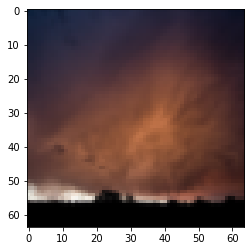

In [177]:
index = 208
plt.imshow(train_set_x_orig[index])
print ( str(train_y[:, index]) + ", it's a '" +
classes[np.squeeze(train_y[:, index])].decode("utf-8")+"'" )

In [33]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [35]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) +", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

In [178]:
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) +", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [59]:
train_X_flat = train_set_x_orig.reshape(m_train,-1).T
test_X_flat = test_set_x_orig.reshape(m_test,-1).T

In [46]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [52]:
train_X_flat #transposed

array([[ 17, 196,  82, ..., 143,  22,   8],
       [ 31, 192,  71, ..., 155,  24,  28],
       [ 56, 190,  68, ..., 165,  23,  53],
       ...,
       [  0,  82, 138, ...,  85,   4,   0],
       [  0,  80, 141, ..., 107,   5,   0],
       [  0,  81, 142, ..., 149,   0,   0]], dtype=uint8)

In [54]:
train_X_flat

array([[ 17,  31,  56, ...,   0,   0,   0],
       [196, 192, 190, ...,  82,  80,  81],
       [ 82,  71,  68, ..., 138, 141, 142],
       ...,
       [143, 155, 165, ...,  85, 107, 149],
       [ 22,  24,  23, ...,   4,   5,   0],
       [  8,  28,  53, ...,   0,   0,   0]], dtype=uint8)

In [201]:
train_X_flat.shape

(12288, 209)

In [56]:
test_X_flat

array([[158, 104,  83, ..., 173, 128, 110],
       [115, 110, 111, ..., 171, 176, 186],
       [255, 253, 254, ..., 133, 101, 121],
       ...,
       [ 41,  47,  84, ..., 183, 141, 116],
       [ 18,  18,  16, ..., 144, 137, 108],
       [133, 163,  75, ...,   5,  22,   5]], dtype=uint8)

In [58]:
test_X_flat #transposed

array([[158, 115, 255, ...,  41,  18, 133],
       [104, 110, 253, ...,  47,  18, 163],
       [ 83, 111, 254, ...,  84,  16,  75],
       ...,
       [173, 171, 133, ..., 183, 144,   5],
       [128, 176, 101, ..., 141, 137,  22],
       [110, 186, 121, ..., 116, 108,   5]], dtype=uint8)

In [63]:
print ("train_set_x_flatten shape: " + str(train_X_flat.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_X_flat.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " +str(train_X_flat[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [68]:
len(test_X_flat[:,0])

12288

In [66]:
for i in range(len(test_X_flat[0])): # ZERO!!!  <========!!!!!!! <---(@_@)
    count=i    #                               \|~|~|~|/
count # why 49? indexing starts from zero ^^^^\__(;-;)__/^^^^^

49

In [182]:
train_X = train_X_flat/255
test_X = test_X_flat/255

In [72]:
def sigmoid(z):
    
    s = 1/(1+np.exp(-z))
    
    return s

In [185]:
def initialize_with_zeros(dim):
   
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b  

In [133]:
def propogation(w, b, X, Y):
    
    m = m_train
    a = sigmoid(np.dot(w.T, X) + b)  # Activation Unit
    J = - (np.dot(Y,np.log(a.T)) + np.dot(np.log(1-a), (1-Y).T))/m # Cost Func
    
    dw = np.dot(X, (a-Y).T)/m
    db = np.sum(a-Y)/m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    J = np.squeeze(J)
    assert(J.shape == ())
    
    grads = {
            "dw": dw,
            "db": db
                    }
    return grads, J

In [189]:
def optimize(w, b, X, Y, num_iter, alpha, display_cost_in_process=False):
    
    J_theta = []
    
    for i in range(num_iter):

        grads, J = propogation(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - alpha*dw
        b = b - alpha*db
        
        if i % 100 == 0:
            
            J_theta.append(J)
            
        if display_cost_in_process and (i+1) % 100 == 0:
            print ("Cost after {} iterations: {}".format(i+1,J))

    params = {
              "w": w,
              "b": b
                    }
    grads = {
              "dw":dw,
              "db":db
                    }
    return params, grads, J_theta

In [166]:
w = np.array([[1.],[2.]])

In [167]:
b = 2.

In [168]:
X = np.array([[1.,2.,-1.],[3.,4.,-3.2]])

In [169]:
Y = np.array([[1,0,1]])

In [172]:
theta, grads, J_theta = grad_descent(w, b, X, Y, num_iter=100, alpha=0.009, display_cost_in_process=True )

Cost after 25 iterations: 0.08297612433919029
Cost after 50 iterations: 0.08266402794782185
Cost after 75 iterations: 0.08235196788412544
Cost after 100 iterations: 0.08203994516370493


In [173]:
print ("w = " + str(theta["w"]))
print ("b = " + str(theta["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.98710243]
 [1.96906251]]
b = 1.9999801189197395
dw = [[0.01432932]
 [0.03437079]]
db = 2.333073994251479e-05


In [174]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_pred = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    a = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(a.shape[1]):
        
        if a[0][i]<=0.5:
            a[0][i]=0
        else:
            a[0][i]=1
            
    Y_pred = a
    
    assert(Y_pred.shape == (1,m))
    
    return Y_pred

In [175]:
predict(w,b,X)

array([[1., 1., 0.]])

In [179]:
def model(X_train, Y_train, X_test, Y_test, num_iter = 2000, alpha = 0.5, display_cost_in_process= False):
    w, b = initialize_with_zeros(X_train.shape[0])
    
    parameters, grads, J_theta = optimize(w, b, X_train, Y_train, num_iter, alpha, display_cost_in_process)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_pred_test = predict(w, b, X_test)
    Y_pred_train = predict(w, b, X_train)9o9
    
    print("train accuracy: {}".format(100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))
    print("test accuracy: {}".format(100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))
    
    
    d = {
        "J_theta": J_theta,
        "Y_pred_test": Y_pred_test,
        "Y_pred_train": Y_pred_train,
        "w": w,
        "b": b,
        "alpha": alpha,
        "num_iter": num_iter
        }
    
    return d

In [190]:
d = model(train_X, train_y, test_X, test_y,num_iter = 2000, alpha = 0.005, display_cost_in_process = True)

Cost after 100 iterations: 0.6448978829531701
Cost after 200 iterations: 0.484893614148485
Cost after 300 iterations: 0.37776149521638064
Cost after 400 iterations: 0.33177540555235874
Cost after 500 iterations: 0.3035286720260554
Cost after 600 iterations: 0.2800942775796751
Cost after 700 iterations: 0.26022584756281886
Cost after 800 iterations: 0.2431001839983885
Cost after 900 iterations: 0.2281443276946537
Cost after 1000 iterations: 0.21494377069682485
Cost after 1100 iterations: 0.20318928219104626
Cost after 1200 iterations: 0.19264428020365895
Cost after 1300 iterations: 0.183123891531329
Cost after 1400 iterations: 0.17448101386887016
Cost after 1500 iterations: 0.1665967535404291
Cost after 1600 iterations: 0.15937369509858543
Cost after 1700 iterations: 0.15273105849939209
Cost after 1800 iterations: 0.14660114629898888
Cost after 1900 iterations: 0.14092669166965172
Cost after 2000 iterations: 0.13565884743936965
train accuracy: 99.04306220095694
test accuracy: 70.0


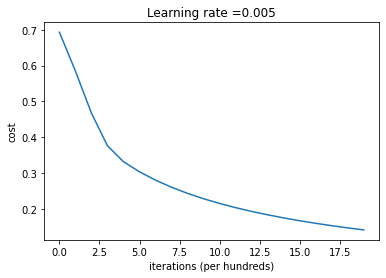

In [192]:
J_theta = np.squeeze(d['J_theta'])
plt.plot(J_theta)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["alpha"]))
plt.show()

In [193]:
learning_rates = [0.01, 0.001, 0.0001]

In [196]:
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_X, train_y, test_X, test_y, num_iter = 1500, alpha = i, display_cost_in_process= False)
    print ('\n' + "----------------------------------" + '\n')

learning rate is: 0.01
train accuracy: 99.52153110047847
test accuracy: 68.0

----------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478
test accuracy: 64.0

----------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895
test accuracy: 36.0

----------------------------------



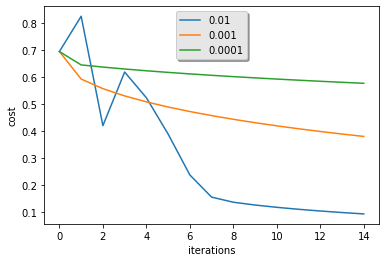

In [199]:
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["J_theta"]), label=str(models[str(i)]["alpha"]))
plt.ylabel('cost')
plt.xlabel('iterations')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [ ]:
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_X, train_y, test_X, test_y, num_iter = 1500, alpha = i, display_cost_in_process= False)
    print ('\n' + "----------------------------------" + '\n')

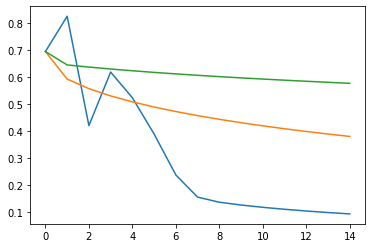

In [200]:
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["J_theta"]), label=str(models[str(i)]["alpha"]))